<a href="https://colab.research.google.com/github/Intina47/-brute/blob/main/meta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install hyperspy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 968.9/968.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 51.3 MB/s eta 0:00:00
  Attempting uninstall: python-box
    Found existing installation: python-box 7.1.1
    Uninstalling python-box-7.1.1:
      Successfully uninstalled python-box-7.1.1


In [4]:
import tensorflow as tf
import hyperspy.api as hs
import matplotlib.pyplot as plt

In [5]:
image_url = "https://images.datacamp.com/image/upload/v1686761792/Figure_13_An_example_of_image_classification_This_image_has_been_classified_as_Dinner_3d5f76bcb0.jpg"
image_path = tf.keras.utils.get_file("sample_image1.jpg", image_url)


148676/148676 [==============================] - 0s 0us/step


In [6]:
# load and preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224,224))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = tf.keras.applications.mobilenet_v2.preprocess_input(image_array)

In [7]:
# load pre-trained MobileNetV2 model
model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

9406464/9406464 [==============================] - 0s 0us/step


In [13]:
# extract features from the image
features = model.predict(tf.expand_dims(image_array, axis=0))

1/1 [==============================] - 0s 22ms/step


In [14]:
# perform global average pooling
pooled_features = tf.reduce_mean(features, axis=(1,2))

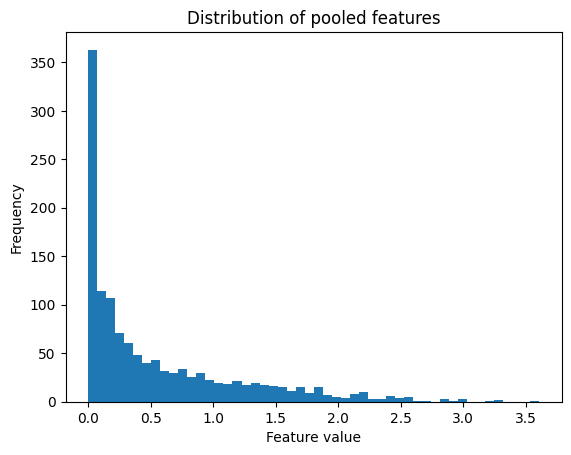

In [15]:
# visualize extracted features
plt.hist(pooled_features.numpy().flatten(), bins=50)
plt.xlabel('Feature value')
plt.ylabel('Frequency')
plt.title('Distribution of pooled features')
plt.show()